In [1]:
import matplotlib.pyplot as plt
import numpy as np
from utils import *

In [2]:
test_cases = [0,1,2,3,4,5]
y_pred = np.empty((0,6,21))
y_gt = np.empty((0,6,21))

for tc in test_cases:
    print(f"start {tc}")
    model_folder = f"../training/saved/2024-04-03/{tc}_1_8_octaves"
    archive = np.load(model_folder + "/predictions.npz")
    print(f"{tc}: loaded archive")
    y_pred = np.concatenate((y_pred, archive["y_pred"]), axis=0)
    print(f"{tc}: loaded pred")
    y_gt = np.concatenate((y_gt, archive["y_gt"]), axis=0)
    print(f"{tc}: loaded gt")

start 0
0: loaded archive
0: loaded pred
0: loaded gt
start 1
1: loaded archive
1: loaded pred
1: loaded gt
start 2
2: loaded archive
2: loaded pred
2: loaded gt
start 3
3: loaded archive
3: loaded pred
3: loaded gt
start 4
4: loaded archive
4: loaded pred
4: loaded gt
start 5
5: loaded archive
5: loaded pred
5: loaded gt


In [3]:
# gt_total - total number in gt samples
# rt - right tab
# wtrn - wrong tab, right note
# x - nothing

frets = []
for i in range(0,6):
    frets.append([])
    for j in range(0,20):
        frets[i].append({
                "gt_total" : 0,
                "rt" : 0,
                "wtrn" : 0,
                "x" : 0
        })

l = len(y_pred)
for i in range(l):
    gt_tab = y_gt[i]
    pred_tab = y_pred[i]

    gt_metadata = notes_and_positions(gt_tab)
    pred_metadata = notes_and_positions(pred_tab)

    for string in range(0,6):
        gt_note = gt_metadata["notes"][string]
        gt_fret = gt_metadata["frets"][string]

        if gt_fret >= 0:
            frets[string][gt_fret]["gt_total"] += 1

        pred_note = pred_metadata["notes"][string]
        pred_fret = pred_metadata["frets"][string]

        found = False
        for aux_string in range(0,6):
            if gt_note > 0 and gt_note == pred_metadata["notes"][aux_string]:
                found = True
                if string == aux_string:
                    #it found the right position
                    frets[string][gt_fret]["rt"] += 1
                else:
                    #it found the right note, but somewhere else
                    frets[string][gt_fret]["wtrn"] += 1
        if not found and gt_fret >= 0:
            frets[string][gt_fret]["x"] += 1

for i in range(0,6):
    for j in range(0,20):
        print(f"String: {i+1}, fret: {j}, total: {frets[i][j]['gt_total']}, rt: {frets[i][j]['rt']}, wtrn: {frets[i][j]['wtrn']},x: {frets[i][j]['x']}")

String: 1, fret: 0, total: 14080, rt: 11243, wtrn: 0,x: 2837
String: 1, fret: 1, total: 10406, rt: 8998, wtrn: 0,x: 1408
String: 1, fret: 2, total: 8603, rt: 7457, wtrn: 0,x: 1146
String: 1, fret: 3, total: 11622, rt: 10137, wtrn: 0,x: 1485
String: 1, fret: 4, total: 11872, rt: 9504, wtrn: 0,x: 2368
String: 1, fret: 5, total: 5653, rt: 3152, wtrn: 981,x: 1645
String: 1, fret: 6, total: 9968, rt: 7815, wtrn: 713,x: 1732
String: 1, fret: 7, total: 3192, rt: 1010, wtrn: 1258,x: 1153
String: 1, fret: 8, total: 2337, rt: 956, wtrn: 862,x: 776
String: 1, fret: 9, total: 1382, rt: 26, wtrn: 1144,x: 229
String: 1, fret: 10, total: 949, rt: 10, wtrn: 616,x: 333
String: 1, fret: 11, total: 110, rt: 0, wtrn: 101,x: 9
String: 1, fret: 12, total: 85, rt: 0, wtrn: 64,x: 26
String: 1, fret: 13, total: 0, rt: 0, wtrn: 0,x: 0
String: 1, fret: 14, total: 15, rt: 0, wtrn: 13,x: 2
String: 1, fret: 15, total: 0, rt: 0, wtrn: 0,x: 0
String: 1, fret: 16, total: 0, rt: 0, wtrn: 0,x: 0
String: 1, fret: 17, tot

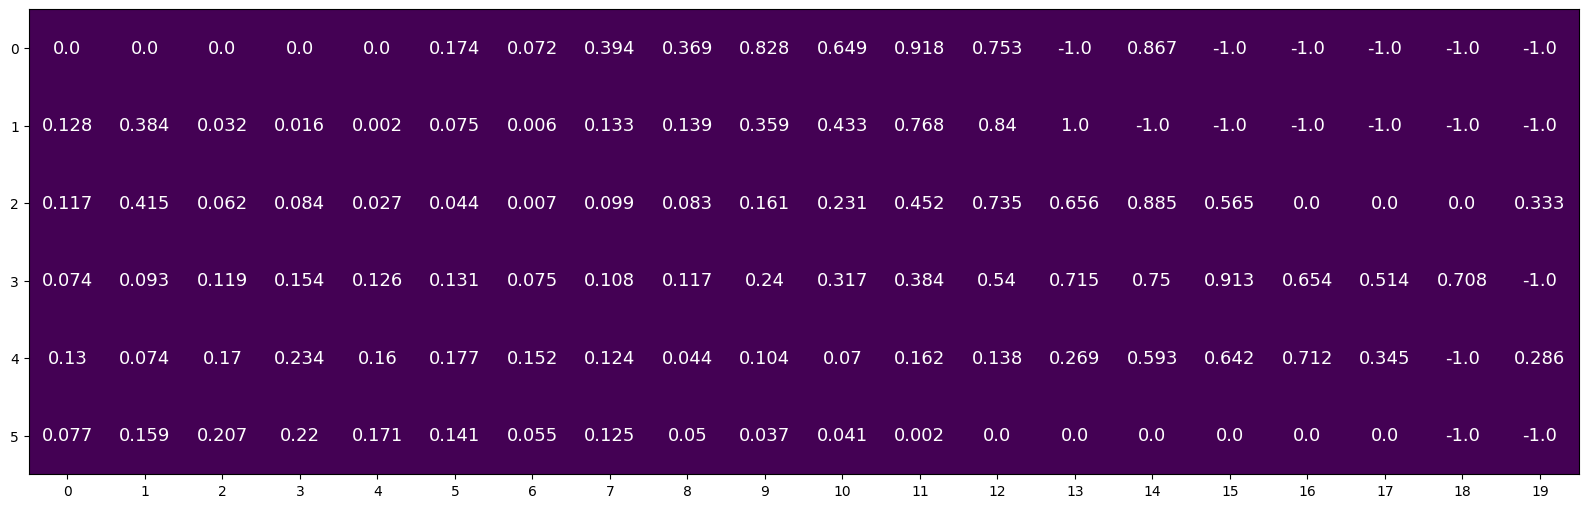

In [4]:
fig, ax = plt.subplots(figsize=(20,30))
heatmap = ax.imshow([[0]*20]*6)
for i in range(6):
    for j in range(20):
        #text = ax.text(j, i, f"T: {frets[i][j]['gt_total']}\nRN: {frets[i][j]['rt']}\n WTRN: {frets[i][j]['wtrn']}\nX: {frets[i][j]['x']}", ha="center", va="center", color="w", fontsize=8)
        value = -1.0
        if frets[i][j]['gt_total'] > 0:
            value = frets[i][j]['wtrn'] / frets[i][j]['gt_total']
        text = ax.text(j, i, round(value, 3), ha="center", va="center", color="w", fontsize=13)
plt.xticks(np.arange(0,20,1))
plt.show()

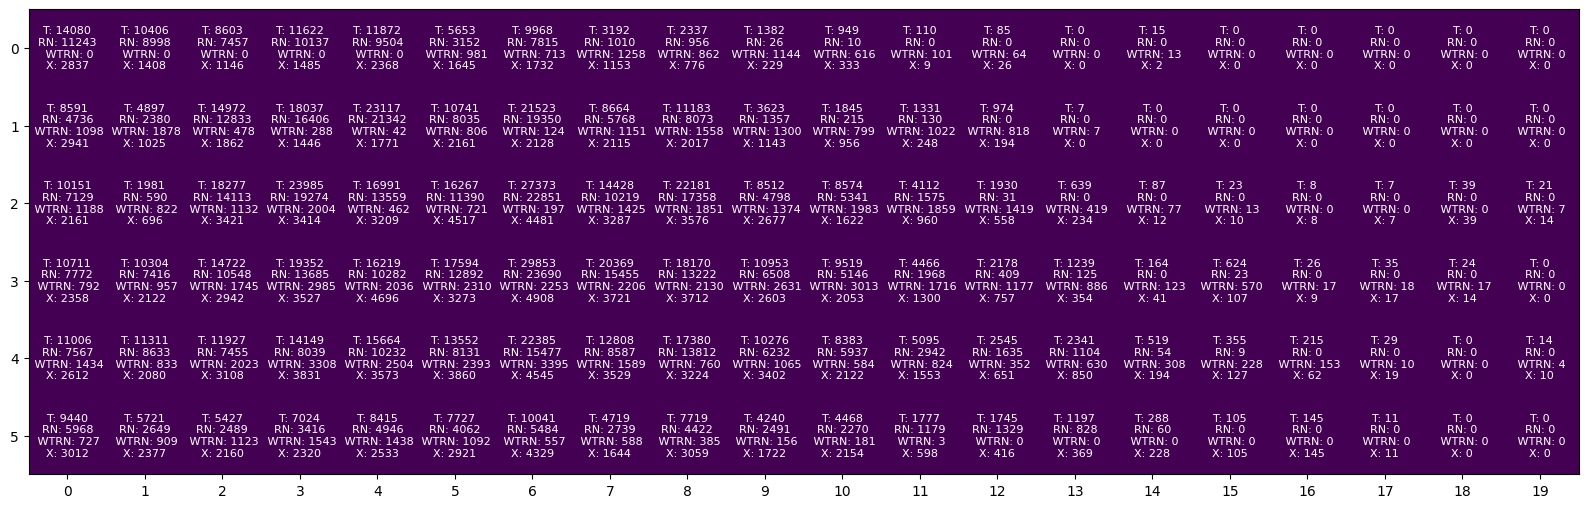

In [5]:
fig, ax = plt.subplots(figsize=(20,30))
heatmap = ax.imshow([[0]*20]*6)
for i in range(6):
    for j in range(20):
        text = ax.text(j, i, f"T: {frets[i][j]['gt_total']}\nRN: {frets[i][j]['rt']}\n WTRN: {frets[i][j]['wtrn']}\nX: {frets[i][j]['x']}", ha="center", va="center", color="w", fontsize=8)
        # value = 0.0
        # if frets[i][j]['x'] > 0:
        #     value = frets[i][j]['wtrn'] / frets[i][j]['x']
        # text = ax.text(j, i, round(value, 3), ha="center", va="center", color="w", fontsize=13)
plt.xticks(np.arange(0,20,1))
plt.show()

In [7]:
tab_performance_x = [
    [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14],
    [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
    [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
    [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
    [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19],
    [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]
]

tab_performance_y = [
    [0.7985085227272727, 0.864693446088795, 0.8667906544228757, 0.8722250903458957, 0.8005390835579514, 0.5575800459932779, 0.7840088282504013, 0.31641604010025065, 0.40907145913564397, 0.01881331403762663, 0.01053740779768177, 0.0, 0.0, 0.0],
    [0.5512745896868816, 0.48601184398611397, 0.8571333155223083, 0.909574762987193, 0.9232166803650993, 0.7480681500791361, 0.8990382381638248, 0.6657433056325023, 0.7218993114548868, 0.3745514766767872, 0.11653116531165311, 0.09767092411720511, 0.0, 0.0],
    [0.7022953403605556, 0.2978293791014639, 0.7721726760409258, 0.8035855743172816, 0.7980107115531752, 0.7001905698653716, 0.8348007160340482, 0.7082755752703077, 0.7825616518642081, 0.5636748120300752, 0.6229297877303476, 0.3830252918287938, 0.01606217616580311, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.7256091868172906, 0.71972049689441, 0.7164787393017253, 0.7071620504340637, 0.6339478389543128, 0.7327498010685461, 0.7935550865909624, 0.7587510432520006, 0.727682993946065, 0.5941751118415046, 0.5406030045172813, 0.4406627854903717, 0.18778696051423324, 0.10088781275221953, 0.0, 0.03685897435897436, 0.0, 0.0, 0.0],
    [0.6875340723241868, 0.7632393245513217, 0.6250524021128532, 0.5681673616510001, 0.6532175689479061, 0.5999852420306966, 0.6914004914004914, 0.6704403497813867, 0.7947065592635213, 0.6064616582327754, 0.7082190146725516, 0.5774288518155054, 0.6424361493123772, 0.4715933361811192, 0.10404624277456648, 0.02535211267605634, 0.0, 0.0, 0.0],
    [0.6322033898305085, 0.46303093864708966, 0.4586327621153492, 0.4863325740318907, 0.5877599524658348, 0.5256891419697166, 0.5461607409620556, 0.5804195804195804, 0.5728721336960746, 0.5875, 0.5080572963294538, 0.6634777715250422, 0.7616045845272207, 0.6917293233082706, 0.20833333333333334, 0.0, 0.0, 0.0]
]

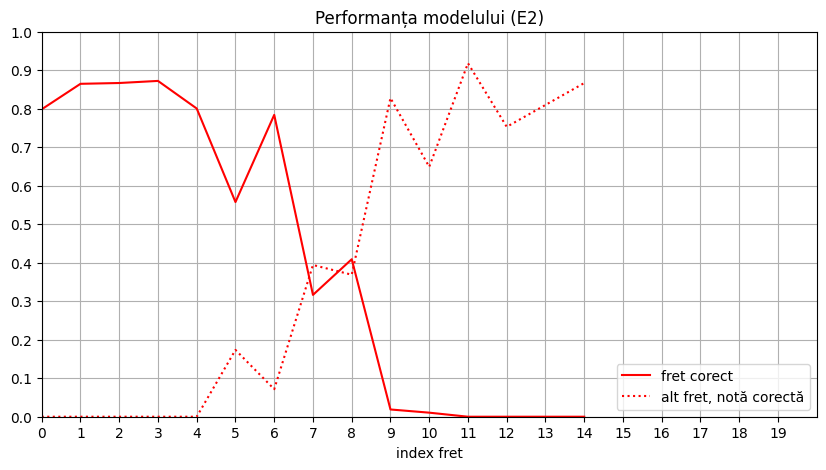

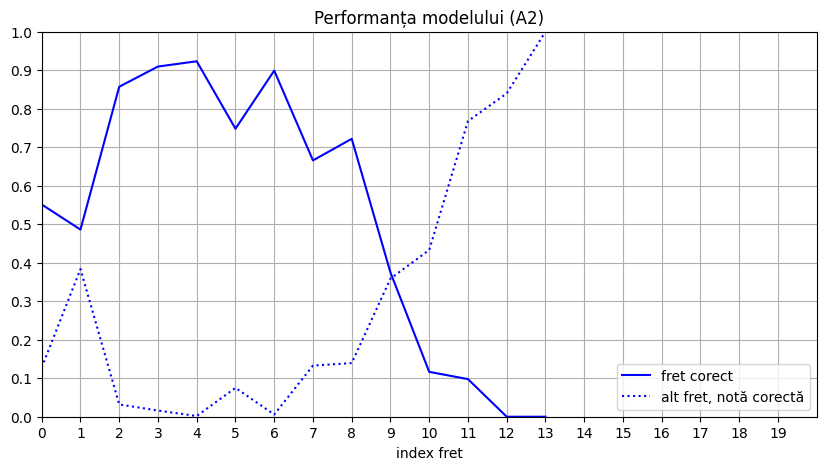

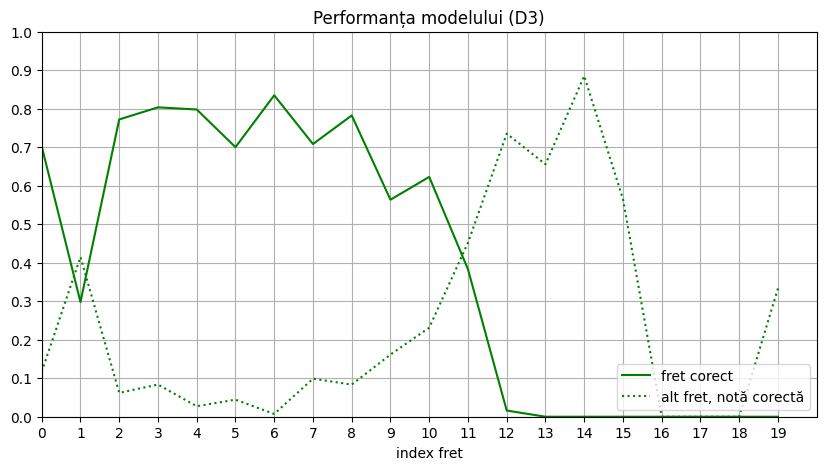

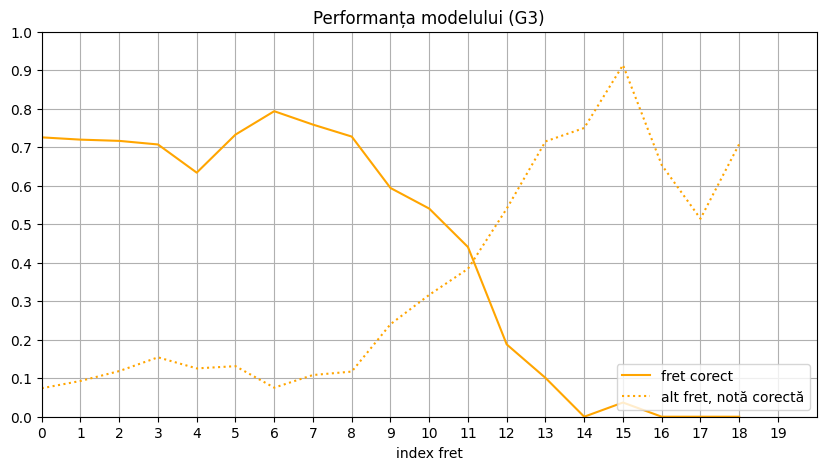

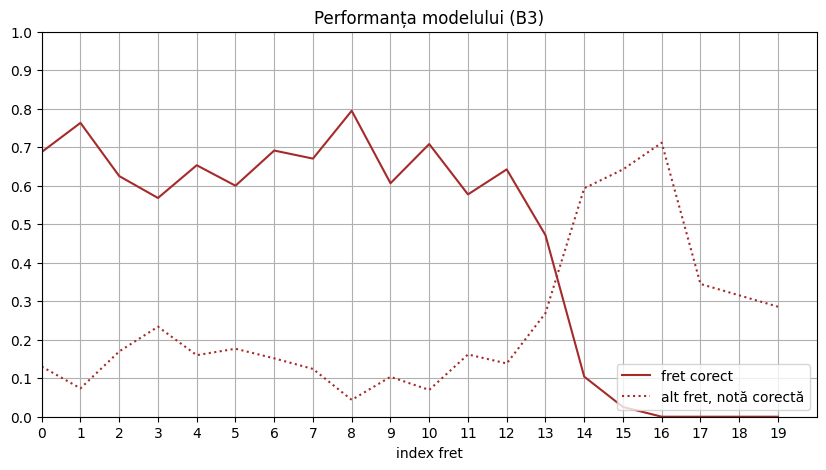

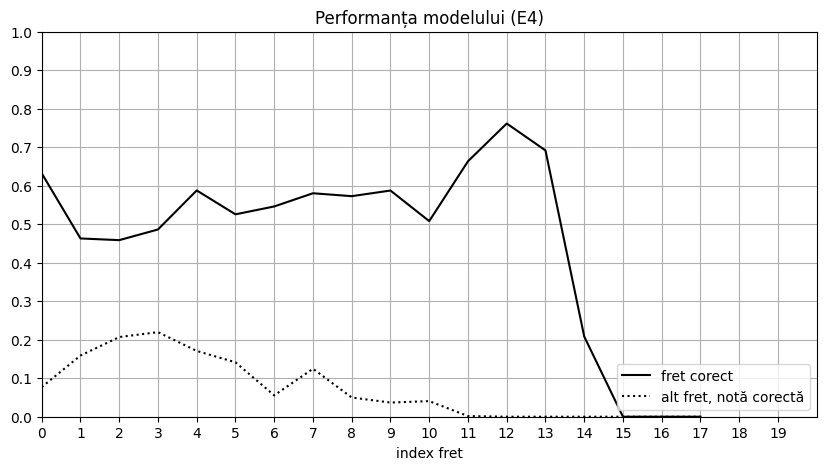

In [8]:
labels = ['E2', 'A2', 'D3', 'G3', 'B3', 'E4']
colors = ['red', 'blue', 'green', 'orange', 'brown', 'black']
for string in range(0,6):
    x = []
    y = []
    for fret in range(0,20):
        if frets[string][fret]['gt_total'] > 0:
            x.append(fret)
            y.append(frets[string][fret]['wtrn'] / frets[string][fret]['gt_total'])
    plt.figure(figsize=(10,5))
    plt.grid()
    plt.title(labels[string])
    plt.xticks(np.arange(0, 20, step=1))
    plt.yticks(np.arange(0, 1.1, step=0.1))
    plt.ylim((0,1))
    plt.xlim((0,20))
    plt.xlabel('index fret')
    plt.title(f'Performanța modelului ({labels[string]})')
    plt.plot(tab_performance_x[string], tab_performance_y[string], color=colors[string], label='fret corect')
    plt.plot(x, y, color=colors[string], linestyle='dotted', label='alt fret, notă corectă')
    plt.legend(loc='lower right')
    plt.show()